# Task 1: Running various sorting Algorithms

### This is a simple method that takes size as an input paramater and outputs a list that has elements in descending order from size-1 to 0.

In [1]:
# Lets first import all our packages we need for this task
import random as random
from time import perf_counter
import matplotlib.pyplot as plt

Create a random generated list in reverse order

In [2]:
def getList(size):
    random_list = []
    for i in range (0,size):
        random_list.append(i)
    
    return list(reversed(random_list))

Bubblesort algo

In [3]:
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    
    return arr

Quicksort algo


In [6]:
def partition(arr, low, high):
    """Return a pivot element for the quicksort results"""
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1
    arr[pivot], arr[high] = arr[high], arr[pivot]
    return pivot

def quicksort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1

    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quicksort(arr, low, pivot-1)
        quicksort(arr, pivot+1, high)
        
def quick_sort_simple(data):
    if len(data) > 1:
        less = []
        equal = []
        greater = []
        pivot = data[0]
        
        for x in data:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            else:
                greater.append(x)
        
        return quick_sort_simple(less) + equal + quick_sort_simple(greater)
    else:
        return data

Mergesort algo


In [7]:
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    
    return result

def mergesort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = mergesort(left)
    right = mergesort(right)
    
    return list(merge(left, right))

# Calculating the time taken to analyse results

### This cell gets lists of sizes from 10 to 1000 and sorts them using the three sorting techniques above while also calculating the time taken for each size by each technique and saving all this information to the dictionary time_taken

In [8]:
time_taken = {'Bubblesort':[], 'Quicksort':[], 'Mergesort':[]}
for i in range (10, 1000):
    orig_list = getList(i)
    
    temp_list = list(orig_list)
    time_start = perf_counter()
    bubble_sort(temp_list)
    time_end = perf_counter()
    time_taken['Bubblesort'].append(time_end - time_start)
    
    temp_list = list(orig_list)
    time_start = perf_counter()
    quick_sort_simple(temp_list)
    time_end = perf_counter()
    time_taken['Quicksort'].append(time_end - time_start)
    
    temp_list = list(orig_list)
    time_start = perf_counter()
    mergesort(temp_list)
    time_end = perf_counter()
    time_taken['Mergesort'].append(time_end - time_start) 

We can now begin plotting the results of the above analysis

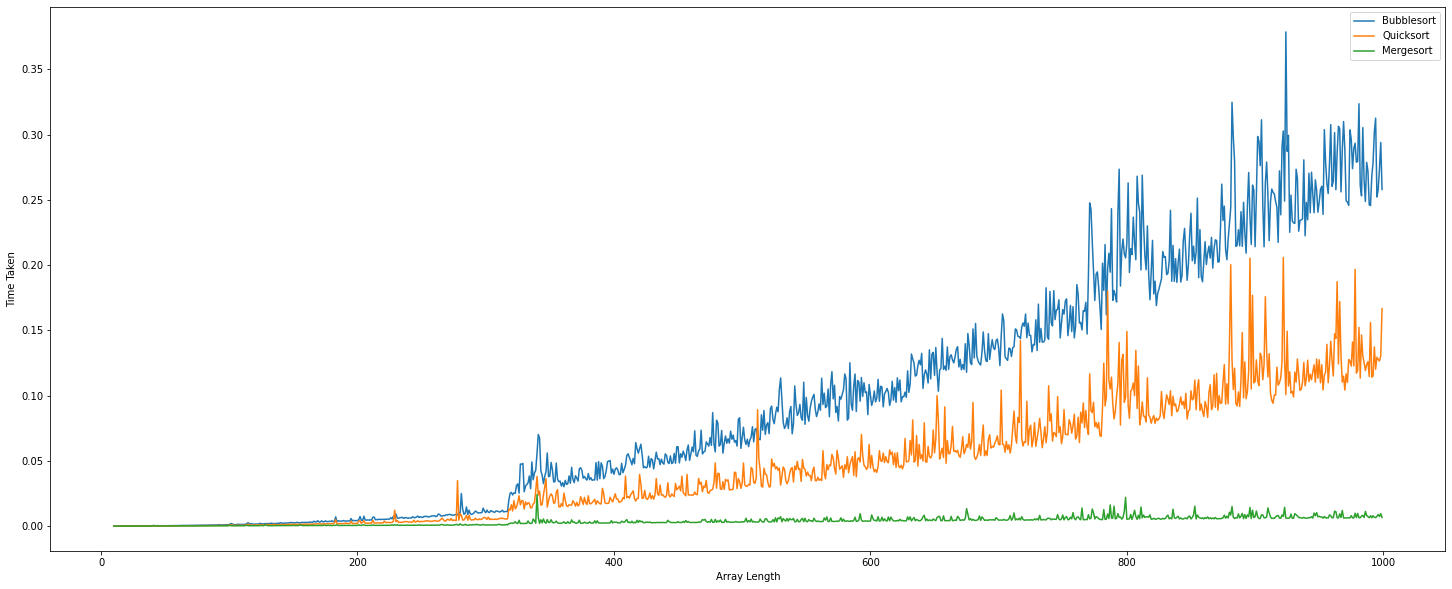

In [9]:
array_lens = list(range(10, 1000))

plt.figure(figsize=(25, 10))

for key, value in time_taken.items():
    plt.plot(array_lens, value, label = key)
plt.xlabel('Array Length')
plt.ylabel('Time Taken')
plt.legend()
plt.show()